## Let's take a look at the Fashion MNIST dataset!

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" alt="cce" border="0">

# Convolutional Neural Networks (CNNs / ConvNets)

<a id="1"></a> <br>
# INTRODUCTION
* **In this project, we will be working on Fashion MNIST Dataset (Implementing with Tensorflow).**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['fashion-mnist_test.csv', 'fashion-mnist_train.csv']


<a id="2"></a> <br>
## Loading the Data Set
* **In this part we load and visualize the data.**

In [2]:
# reading train dataset
# shape: 1 (class) + 28x28 pixels 
train = pd.read_csv("input/fashion-mnist_train.csv")
print(train.shape)

(60000, 785)


In [3]:
# let's look at first five train samples
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# reading test dataset
test = pd.read_csv("input/fashion-mnist_test.csv")
print(test.shape)

(10000, 785)


In [5]:
# let's look at first five test samples
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# put labels into Y_train variable
Y_train = train["label"].values
# Drop 'label' column
X_train = train.drop(labels = ["label"], axis = 1)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# put labels into Y_test variable
Y_test = test["label"].values
# Drop 'label' column
X_test = test.drop(labels = ["label"], axis = 1)
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


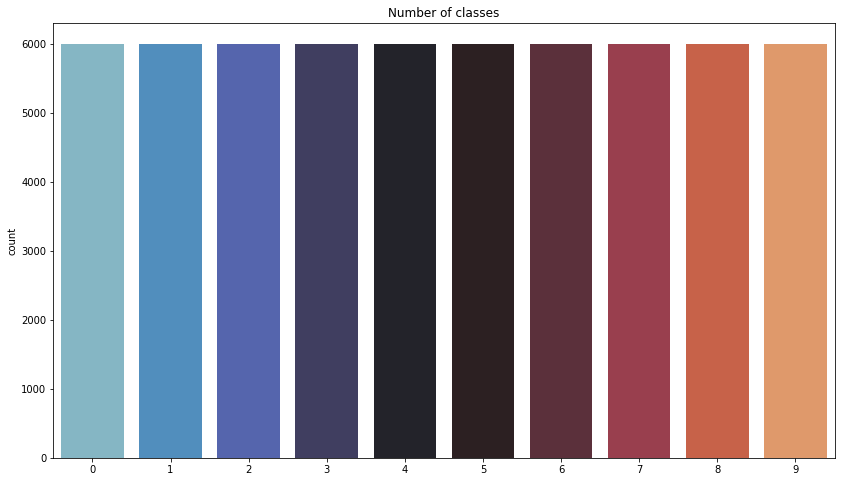

In [8]:
plt.figure(figsize=(14,8))
sns.countplot(Y_train, palette="icefire")
plt.title("Number of classes")
plt.show()

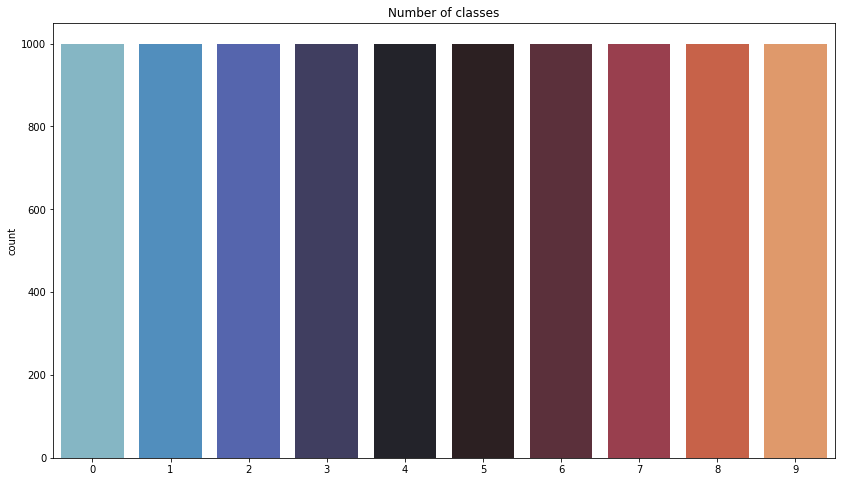

In [9]:
plt.figure(figsize=(14,8))
sns.countplot(Y_test, palette="icefire")
plt.title("Number of classes")
plt.show()

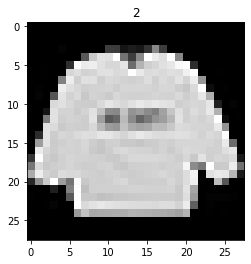

In [10]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(Y_train[0])
plt.imshow(X_train.values.reshape(-1,28,28)[0],cmap="gray")

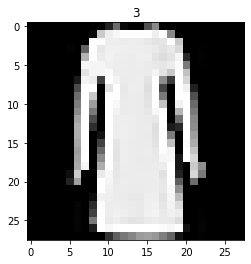

In [11]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(Y_train[17])
plt.imshow(X_train.values.reshape(-1,28,28)[17],cmap="gray")

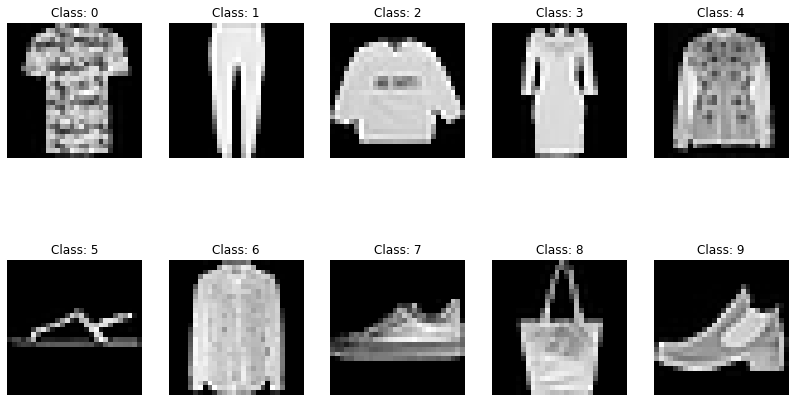

In [12]:
plt.figure(figsize = (14,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    img = train[train.label == i].iloc[0, 1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

<a id="3"></a> <br>
## Normalization, Reshape and Label Encoding 
* **Normalization**
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* **Reshaping**
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Tensorflow needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* **Label Encoding**
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [13]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


In [14]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [15]:
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [16]:
# Reshaping
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [17]:
# Label Encoding (be careful! run just once!)
from tensorflow.keras.utils import to_categorical

# convert to one-hot-encoding(one hot vectors)
Y_train = to_categorical(Y_train, num_classes = 10)
# convert to one-hot-encoding(one hot vectors)
Y_test = to_categorical(Y_test, num_classes = 10)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


<a id="4"></a>
## Train-Test Split
* **We split the data into train and test sets.**
* **test size is 10%.**
* **train size is 90%.**

In [18]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print("x_train shape: ",x_train.shape)
print("x_val shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_val shape :",y_val.shape)

x_train shape:  (54000, 28, 28, 1)
x_val shape:  (6000, 28, 28, 1)
y_train shape:  (54000, 10)
y_val shape : (6000, 10)


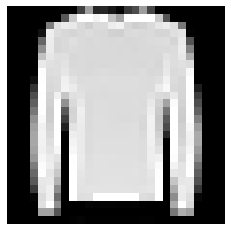

In [19]:
# Some examples
plt.imshow(x_train[4].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

<a id="5"></a>
## Convolutional Neural Network 

## Implementing with Tensorflow

In [20]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()

#1. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#3. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0

<a id="6"></a>
### Define Optimizer   
* **Adam optimizer: Change the learning rate**

In [22]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

<a id="7"></a>
### Compile Model
* **Binary cross entropy used for binary classification problems**
* **Categorical crossentropy must be used since we present a multiclass problem**

In [23]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="9"></a>
### Data Augmentation

In [24]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimension reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

<a id="10"></a>
### Fit the Model

In [30]:
# save the best weights
checkpointer = ModelCheckpoint(filepath="fashion_mnist_model.h5", verbose=1, save_best_only=True)

In [31]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                              shuffle=True,
                              epochs=50, validation_data = (x_val, y_val),
                              verbose = 2, callbacks=[checkpointer]) #we save the best weights with checkpointer

Epoch 1/10
844/844 - 152s - loss: 0.2084 - accuracy: 0.9233 - val_loss: 0.2020 - val_accuracy: 0.9243

Epoch 00001: val_loss improved from inf to 0.20196, saving model to fashion_mnist_model.h5
Epoch 2/10
844/844 - 146s - loss: 0.2076 - accuracy: 0.9229 - val_loss: 0.2266 - val_accuracy: 0.9150

Epoch 00002: val_loss did not improve from 0.20196
Epoch 3/10
844/844 - 145s - loss: 0.1987 - accuracy: 0.9258 - val_loss: 0.2062 - val_accuracy: 0.9230

Epoch 00003: val_loss did not improve from 0.20196
Epoch 4/10
844/844 - 151s - loss: 0.1909 - accuracy: 0.9287 - val_loss: 0.1876 - val_accuracy: 0.9340

Epoch 00004: val_loss improved from 0.20196 to 0.18758, saving model to fashion_mnist_model.h5
Epoch 5/10
844/844 - 149s - loss: 0.1897 - accuracy: 0.9301 - val_loss: 0.2201 - val_accuracy: 0.9175

Epoch 00005: val_loss did not improve from 0.18758
Epoch 6/10
844/844 - 149s - loss: 0.1859 - accuracy: 0.9321 - val_loss: 0.1789 - val_accuracy: 0.9332

Epoch 00006: val_loss improved from 0.18758

In [32]:
# save model to json
model_json = model.to_json() #fashion_mnist_model.h5 - Save the file in JSON format.
with open("fashion_mnist_model.json", "w") as json_file:
    json_file.write(model_json)

In [33]:
# if required to load the model wit the best weights saved in the previous callback
# model_best = load_model("fashion_mnist_model.h5")

<a id="11"></a>
## Evaluate the model
* **Validation and Loss visualization**

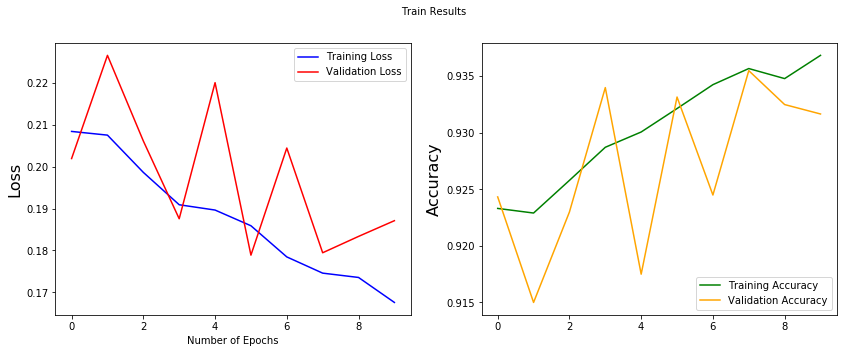

In [36]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [38]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])

Train accuracy of the model:  0.9368518590927124


In [39]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.16757804155349731


In [40]:
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])

Validation accuracy of the model:  0.9316666722297668


In [41]:
print('Validation loss of the model: ',history.history['val_loss'][-1])

Validation loss of the model:  0.18711629509925842


In [42]:
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.17528320848941803
Test Accuracy: 0.9398999810218811


<a id="12"></a>
### Predict For Random Sample

(10000, 28, 28, 1)


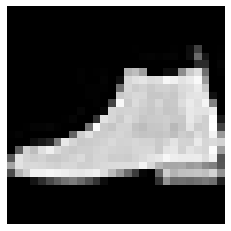

In [43]:
print(X_test.shape)
plt.imshow(X_test[100].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

In [44]:
trueY = Y_test[100]
img = X_test[100]
test_img = img.reshape(1,28,28,1)

preds = model.predict_classes(test_img)
prob = model.predict_proba(test_img)

print("trueY: ",np.argmax(trueY))
print("Preds: ",preds)
print("Prob: ",prob)

trueY:  9
Preds:  [9]
Prob:  [[4.3239346e-08 3.9515252e-10 3.9365666e-08 3.0595360e-10 6.9917130e-09
  1.4021018e-07 6.4629728e-09 6.1018150e-06 8.2761520e-11 9.9999368e-01]]


<a id="13"></a>
### Reading,Resizing and Testing the test image

In [45]:
# image_path = "../yourPath/test_image.jpg"

# test_image_orjinal = image.load_img(image_path) # orjinal renkli görüntü

# test_image = image.load_img(image_path, target_size=(48,48), grayscale=True)
# test_data = image.img_to_array(test_image)
# test_img = test_data.reshape(1,48,48,1)

# preds = model_best.predict_classes(test_img)
# prob = model_best.predict_proba(test_img)

# print("Preds: ",preds)
# print("Prob: ",prob)

<a id="14"></a>
### Confusion Matrix

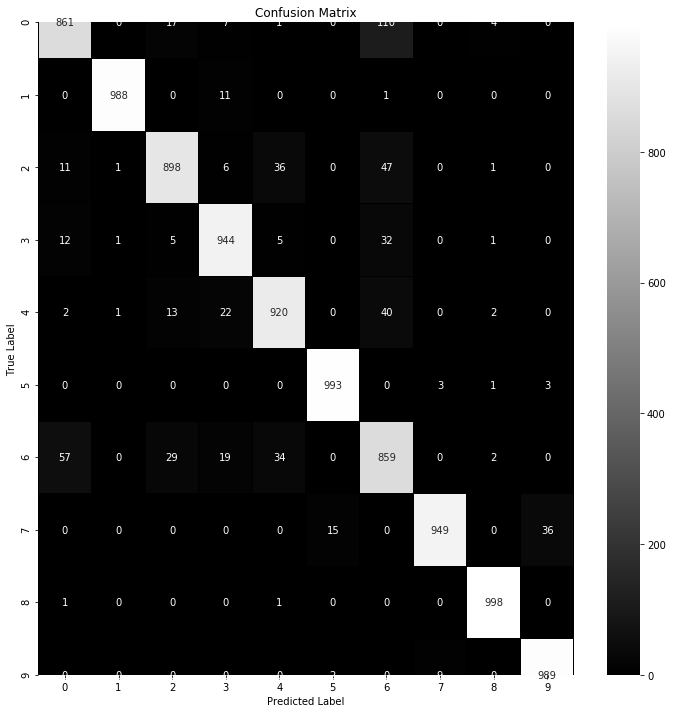

In [46]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_test, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [47]:
for i in range(len(confusion_mtx)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_mtx[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 139 out of 1000
Percentage of True Prediction: 86.10%
***********************************************************
Class: 1
Number of Wrong Prediction: 12 out of 1000
Percentage of True Prediction: 98.80%
***********************************************************
Class: 2
Number of Wrong Prediction: 102 out of 1000
Percentage of True Prediction: 89.80%
***********************************************************
Class: 3
Number of Wrong Prediction: 56 out of 1000
Percentage of True Prediction: 94.40%
***********************************************************
Class: 4
Number of Wrong Prediction: 80 out of 1000
Percentage of True Prediction: 92.00%
***********************************************************
Class: 5
Number of Wrong Prediction: 7 out of 1000
Percentage of True Prediction: 99.30%
***********************************************************
Class: 6
Number of Wrong Prediction: 141 out of 1000
Percentage of True Prediction: 85.90%
********